#Função a ser aproximada: Griewank

## **Plot 2D da função Griewank**

![alt text](http://2.bp.blogspot.com/_otsWqKrA2RI/TJHH5DguZjI/AAAAAAAAACo/01VNZLSvrlo/s400/fn_griewank.bmp)

### **Definição e ótimo global:**
### Observação: Considere o intervalo entre 0 e 1 para simplificação!

![alt text](https://www.cs.unm.edu/~neal.holts/dga/benchmarkFunction/images/griewankLatex.png)

#Declarar a função

In [1]:
import math
def Griewank(input):
    sum = 0
    for x in input:
        sum += x * x
    product = 1
    for i in range(len(input)):
        product *= math.cos(input[i] / math.sqrt(i + 1))
    return 1 + sum / 4000 - product

In [2]:
#Teste de chamada para duas variáveis
Griewank([2,3])

0.7855494848011055

#Amostragem da função a ser aproximada

In [3]:
import random
n = 2
samples = 1000

random_samples = []
for sample in range(samples):
  input = []
  for i in range(n):
    input.append(random.random())
  random_samples.append(input)

#converte para numpy array
import numpy as np
random_samples = np.array(random_samples)

random_samples[0:5] # 5 primeiras amostras

array([[0.67312128, 0.67982835],
       [0.89084535, 0.32880461],
       [0.45218953, 0.98583603],
       [0.07689903, 0.15817544],
       [0.98960094, 0.49160198]])

In [4]:
#Saída para cada input
y = []
for i in random_samples:
  y.append(Griewank(i))

#Separar base em treino e validação

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(random_samples, y, test_size = 0.2, shuffle=True)

X_train = np.asarray(X_train)
X_val = np.asarray(X_val)
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)

#Treinamento da Rede Neural para aproximar a função

In [6]:
# Importando as bibliotecas do Keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [7]:
# Iniciando a Rede Neural
classifier = Sequential()

# Adicionando a camada de input e a primeira camada escondida
classifier.add(Dense(units = 6, activation = 'relu', input_dim = n))
classifier.add(Dropout(rate = 0.1))

# Adicionando a camada de saída
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede neural
classifier.compile(optimizer = 'adam', loss = 'mse')

# Visualização das camadas da rede
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 18        
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Treinando a rede neural
history = classifier.fit(X_train, y_train, batch_size = 64, epochs = 500, 
                               validation_data = (X_val,y_val))

Epoch 1/500
13/13 [==============================] - 0s 12ms/step - loss: 0.1071 - val_loss: 0.0965
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1021 - val_loss: 0.0919
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0976 - val_loss: 0.0876
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0930 - val_loss: 0.0836
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0887 - val_loss: 0.0796
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0849 - val_loss: 0.0758
Epoch 7/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0805 - val_loss: 0.0720
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0761 - val_loss: 0.0681
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0722 - val_loss: 0.0641
Epoch 10/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0679 - val_loss: 0.0602
Epoch 11

#Avaliar erros de treino e validação

In [9]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


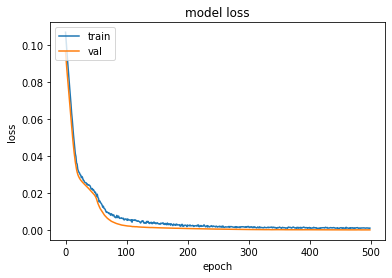

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Fazer previsões e avaliar a rede treinada

###Exercício 1: Avalie a rede treinada com 500 dados amostrados com distribuição uniforme. Salve em uma variável chamada 'y_test' os dados gerados.

In [11]:
#criar base de teste
samples = 500

X_test = []
for sample in range(samples):
  input = []
  for i in range(n):
    input.append(random.random())
  X_test.append(input)

#converte para numpy array
X_test = np.array(X_test)

#Saída para cada input
y_test = []
for i in X_test:
  y_test.append(Griewank(i))

###Exercício 2: Utilize a rede neural para prever o resultado da função para as entradas geradas acima. Chame a variável com os resultados de 'y_pred'.

In [17]:
# Previsão da base de teste
y_pred = classifier.predict(X_test)

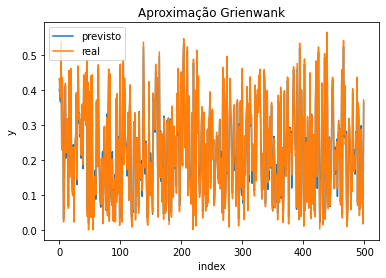

In [13]:
#Real vs. Previsto
plt.plot(y_pred)
plt.plot(y_test)
plt.title('Aproximação Grienwank')
plt.ylabel('y')
plt.xlabel('index')
plt.legend(['previsto', 'real'], loc='upper left')
plt.show()

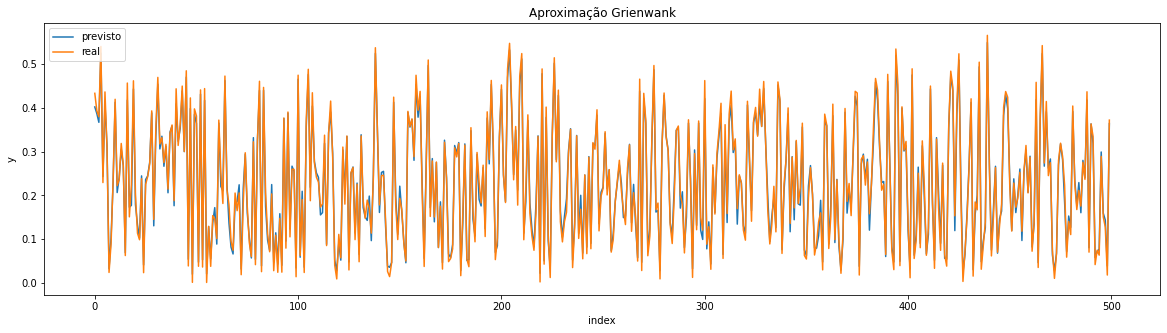

In [18]:
# Vamos aumentar o gráfico
plt.figure(figsize=(20,5))
#Real vs. Previsto
plt.plot(y_pred)
plt.plot(y_test)
plt.title('Aproximação Grienwank')
plt.ylabel('y')
plt.xlabel('index')
plt.legend(['previsto', 'real'], loc='upper left')
plt.show()

###Exercício 3: Faça um plot como o acima, mas utilizando somente 50 amostras da base de teste.

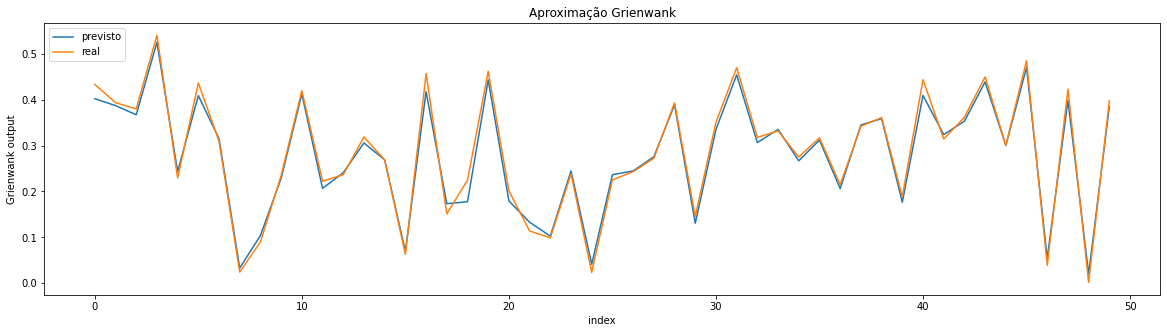

In [19]:
#Real vs. Previsto: parcial
small_y_test = y_test[0:50]
small_y_pred = y_pred[0:50]

plt.figure(figsize=(20,5))

plt.plot(small_y_pred)
plt.plot(small_y_test)
plt.title('Aproximação Grienwank')
plt.ylabel('Grienwank output')
plt.xlabel('index')
plt.legend(['previsto', 'real'], loc='upper left')
plt.show()

In [20]:
# calcular o erro para a base de teste
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_pred,y_test) 

0.000252942053738701